- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')



# 이미지 이진화 (Image Thesholding)


## 기본 임계 처리
- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것

  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!
  
  - 임계값보다 크면 백, 작으면 흑이 되는데,  
    기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태

- 기본적으로 이미지의 segmenting의 가장 간단한 방법

- `cv2.threshold()`

  - Parameters  
    - `src` : input image로 single-channel 이미지.(grayscale 이미지)
    
    - `thresh` : 임계값

    - `maxval` : 임계값을 넘었을 때 적용할 value

    - `type` : thresholding type

  <br>

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval

      - 그 외, 0

    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, maxval

    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh

      - 그 외, src(x, y)

    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)

      - 그 외, 0

    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, src(x, y)

* letters.jpg

  <img src="https://cdn.pixabay.com/photo/2018/09/26/09/07/letters-3704026_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/letters-school-learn-alphabet-abc-3704026/</sub>

In [2]:
files.upload()

Saving letters-3704026_640.jpg to letters-3704026_640.jpg


{'letters-3704026_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xaa\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x02\x03\x07\x01\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x01\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xbc\xda\x953\x8

In [5]:
img = cv2.imread('letters-3704026_640.jpg', 0)  # 0으로 줬기 때문에 gray 스케일로 

In [6]:
img.shape

(426, 640)

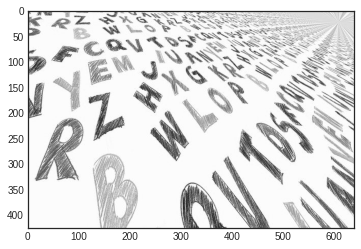

In [14]:
# 원본 확인하고

plt.imshow(img, cmap = 'gray')
plt.show()

In [8]:
ret1, thresh1 = cv2.threshold(img,128, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img,128, 255, cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(img,128, 255, cv2.THRESH_TRUNC)
ret4, thresh4 = cv2.threshold(img,128, 255, cv2.THRESH_TOZERO)
ret5, thresh5 = cv2.threshold(img,128, 255, cv2.THRESH_TOZERO_INV)



In [10]:
titles = ['Origianl', 'BINARY','BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img , thresh1, thresh2, thresh3, thresh4, thresh5]


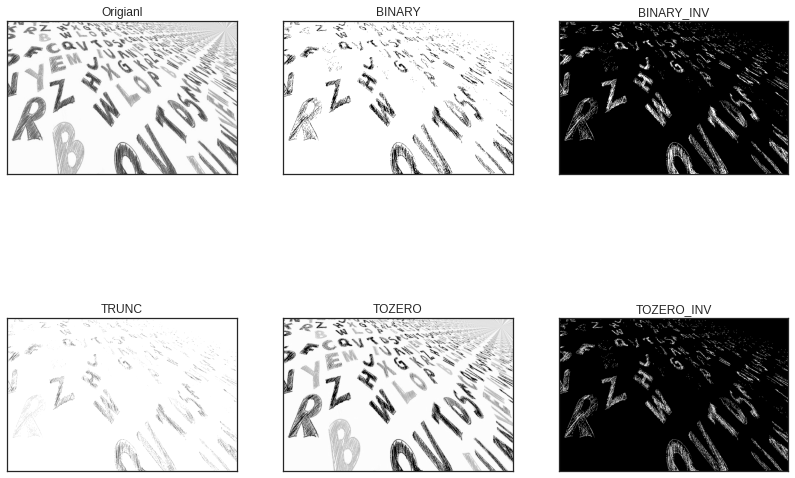

In [13]:
plt.figure(figsize = (14,10))
for i in range(6):
    plt.subplot(2, 3, i+1)          # 2 by 3으로 띄울게
    plt.imshow(images[i], 'gray')   # 위에 list로 정한걸 index로!
    plt.title(titles[i])            # 위에 정한 titles로
    plt.xticks([]), plt.yticks([])  # 둘다 안나오게
    
plt.show()

# binary에 쓰레쉬홀드 128
# binary_int 흑과백이 바뀐
# runc 약간은 흐려진 느낌
# tozero 는 binary보다 더 진한,선명느낌
# tozero_inv는 반대로 흑과백이 바뀐 느낌

- 이미지
  - snow.jpg

  <img src="https://cdn.pixabay.com/photo/2014/12/02/22/05/snowflake-554635_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/snowflake-snow-snowing-winter-cold-554635/</sub>

In [15]:
files.upload()

Saving snowflakes-554635_640.jpg to snowflakes-554635_640.jpg


{'snowflakes-554635_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xaa\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x00\x07\x08\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xca\xca\x8b\xb4\x

In [16]:
img2 = cv2.imread('snowflakes-554635_640.jpg', 0)   # 0으로 해서 gray 스케일로

In [17]:
img2.shape

(426, 640)

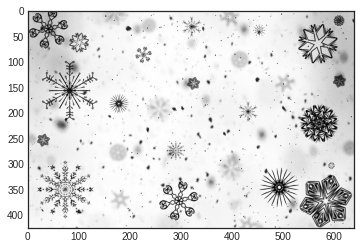

In [18]:
plt.imshow(img2)


In [19]:
ret1, thresh1 = cv2.threshold(img2,128, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img2,128, 255, cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(img2,128, 255, cv2.THRESH_TRUNC)
ret4, thresh4 = cv2.threshold(img2,128, 255, cv2.THRESH_TOZERO)
ret5, thresh5 = cv2.threshold(img2,128, 255, cv2.THRESH_TOZERO_INV)



- 시각화

In [20]:
titles = ['Origianl', 'BINARY','BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img2 , thresh1, thresh2, thresh3, thresh4, thresh5]


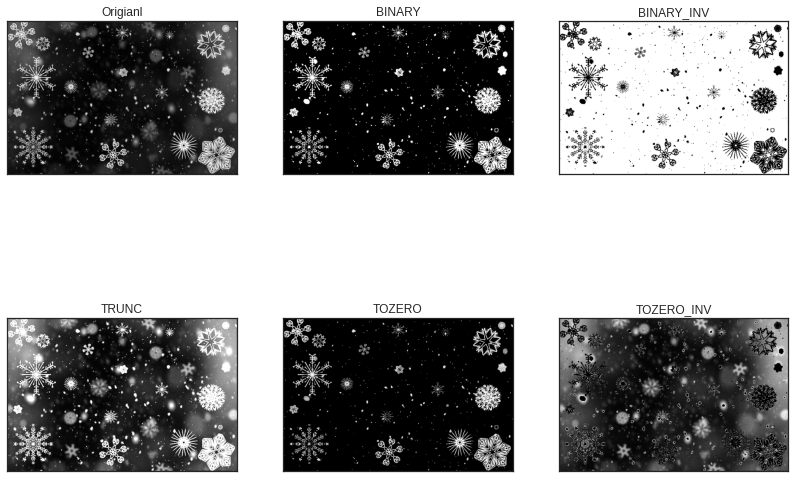

In [21]:
plt.figure(figsize = (14,10))
for i in range(6):
    plt.subplot(2, 3, i+1)          # 2 by 3으로 띄울게
    plt.imshow(images[i], 'gray')   # 위에 list로 정한걸 index로!
    plt.title(titles[i])            # 위에 정한 titles로
    plt.xticks([]), plt.yticks([])  # 둘다 안나오게
    
plt.show()

# binary  선명해짐
# binaray inv 색 반대

# 즉 thresh holding을 통해서 쉽게 필요한 부분만 추출,마스킹 처리 가능

## 적응 임계처리

- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에  
  하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨

- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding

- `cv2.adaptiveThreshold()`

  - Parameters  
    - `src` : grayscale image

    - `maxValue` : 임계값

    - `adaptiveMethod` : thresholding value를 결정하는 계산 방법

    - `thresholdType` : threshold type

    - `blockSize` : thresholding을 적용할 영역 사이즈

    - `C` : 평균이나 가중평균에서 차감할 값

  <br>
  
  - Adaptive Method
    - `cv2.ADAPTIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정

    - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시안 값으로 결정


In [30]:
# adaptivemethod가 좀 다르지 
# 다른건 비슷한데

# adaptivemethod- mean, gaussian 방법 2가지가 있어
img = cv2.imread('snowflakes-554635_640.jpg', 0)

In [31]:
ret, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

In [32]:
# 2가지 방법으로 해볼게

th2  = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)  # mean으로 해볼게
th3  = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)



- 시각화

In [33]:
titles = ['Original', 'Global', 'Mean', 'Gaussian']
images = [img, th1, th2, th3]

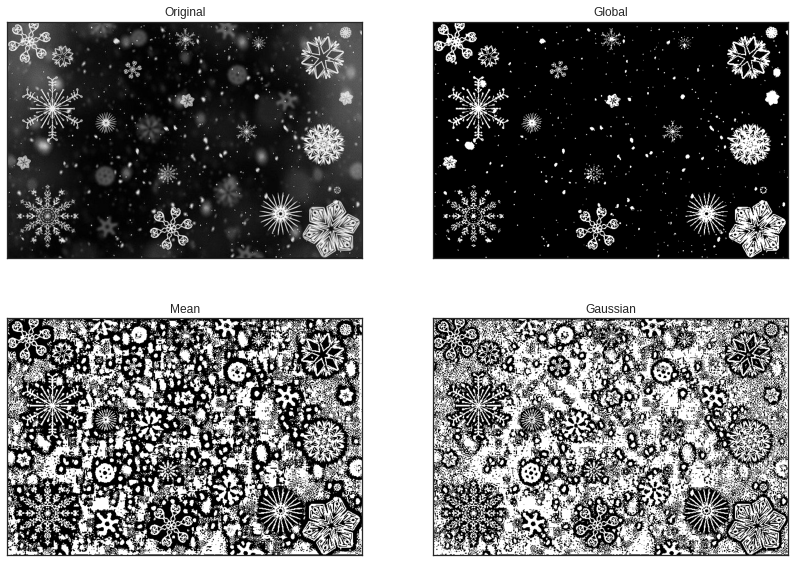

In [34]:
plt.figure(figsize = (14,10))
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# global 전체 영역에 대해 하나의 기준으로만 흑과백을 하고
# but adaptive하니까 평균값을 취해서 각 객체를 다 보여주네ㅋㅋ
# 가우시안도 약간의 noize가 있지만 그래도 global보단 낫지


## Otsu의 이진화
- `Otsu의 이진화`(Otsu’s Binarization)란 bimodal image에서 임계값을 자동으로 계산하는 것

- 임계값을 결정하는 가장 일반적인 방법은 trial and error 방식

- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능

- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU` 를 적용.
  이때 임계값은 0으로 전달

- 이미지
  - noise.jpg

  <img src="https://cdn.pixabay.com/photo/2017/01/04/13/09/star-1951963_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/illustrations/star-grey-noise-banner-monochrome-1951963/</sub>

In [35]:
files.upload()

Saving star-1951963_640.jpg to star-1951963_640.jpg


{'star-1951963_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01h\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\x06\x07\xff\xc4\x00\x15\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf1\x8e\x05dpp\xa8\xa4\x01^n-\x14\x89\x99

In [36]:
img = cv2.imread('star-1951963_640.jpg', 0)


In [37]:
img.shape

(360, 640)

In [38]:
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0 ,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5,5),0)
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


- 시각화

In [39]:
images = [img , 0, th1, img, 0, th2, blur, 0 ,th3]
titles = ['Original Image', 'Histogram', 'Global Thresholding',
          'Original Image', 'Histogram', 'Otsu\'s Thresholding',
          'Gaussian filtered Image', 'Histogram', 'Otsu\'s Thresholding']
          

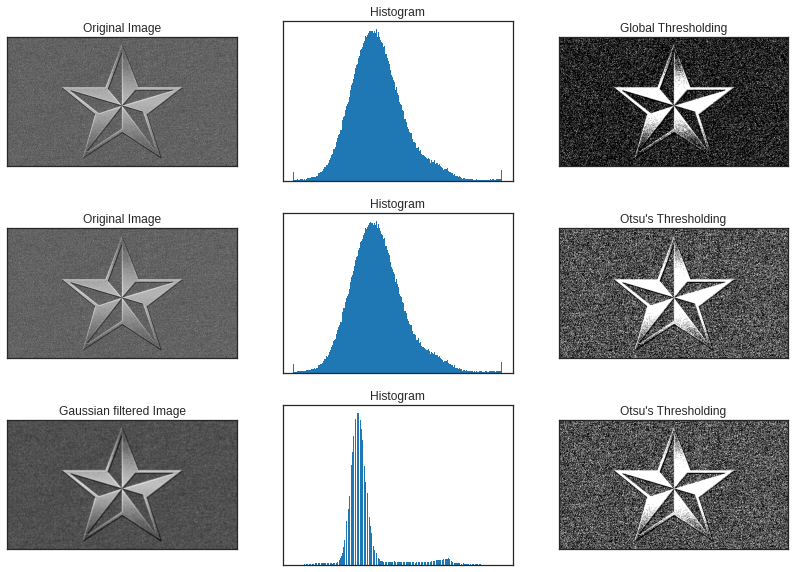

In [41]:
plt.figure(figsize = (14,10))
for i in range(3):                          # 3개씩 출력해야하니까
    plt.subplot(3,3, i*3+1)
    plt.imshow(images[i*3], cmap = 'gray')
    plt.title(titles[i*3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3,3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3 + 1])
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3, i*3+3)
    plt.imshow(images[i*3+2], cmap = 'gray')
    plt.title(titles[i*3+2])
    plt.xticks([]), plt.yticks([])
    
    # 기존의오리지날 이미지에서 hist를 보면
    # hist에 나타나는 peak를 보면 알수잇지

    #global을 기존의 127의 기준으로 흑과백으 ㄹ나눴고
    # otsu는 오리지날에서 hist를 구분해서 흑과백으로 나눳고 -> 좀더 자연스럽고
    # 가우시안은 블러 처리햇기 때문에 hist가 달라지진했지만 적용하니까 threshold를 적용해봣어